### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [ ]:
print(data.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
##drop car column - this column doesn't have enough data to analyze
data = data.drop('car', axis=1)

4. What proportion of the total observations chose to accept the coupon?



In [4]:
acceptance_proportion = data['Y'].mean()
print(f"Proportion of accepted coupons : {acceptance_proportion:.2f}")

Proportion of accepted coupons : 0.57


5. Use a bar plot to visualize the `coupon` column.

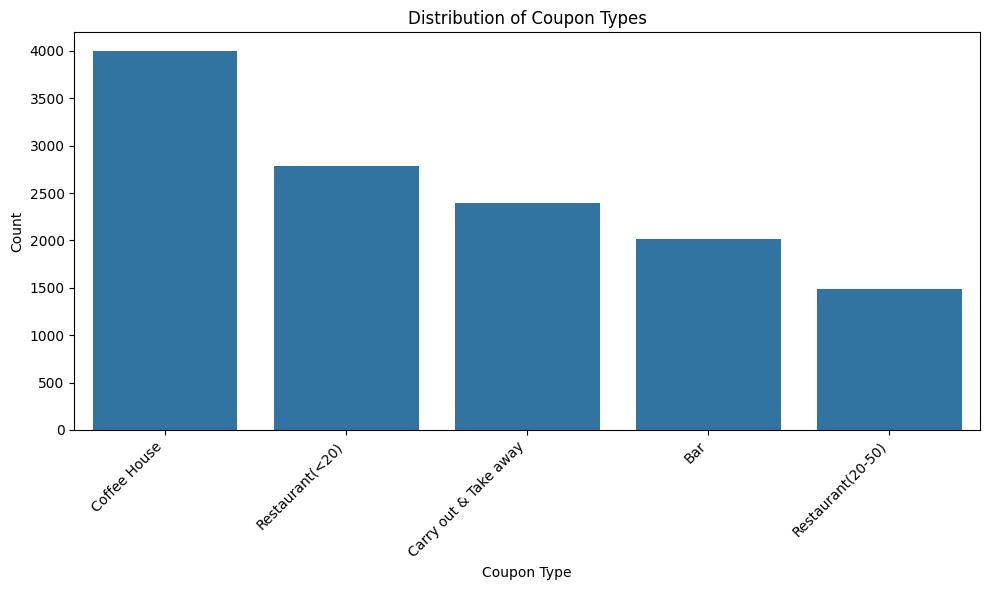

In [5]:
coupon_counts = data['coupon'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=coupon_counts.index, y=coupon_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('images/coupon_dist.png')
plt.show()

6. Use a histogram to visualize the temperature column.

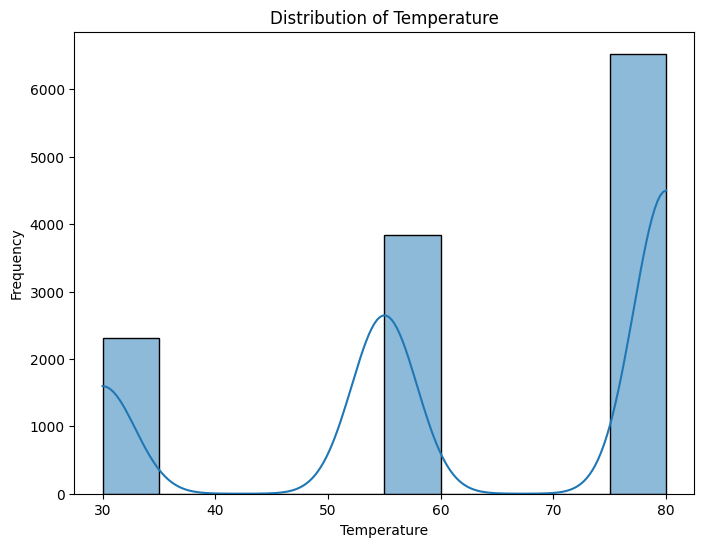

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(data['temperature'], bins=10, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.savefig('images/coupon_dist_temp.png')
plt.show()

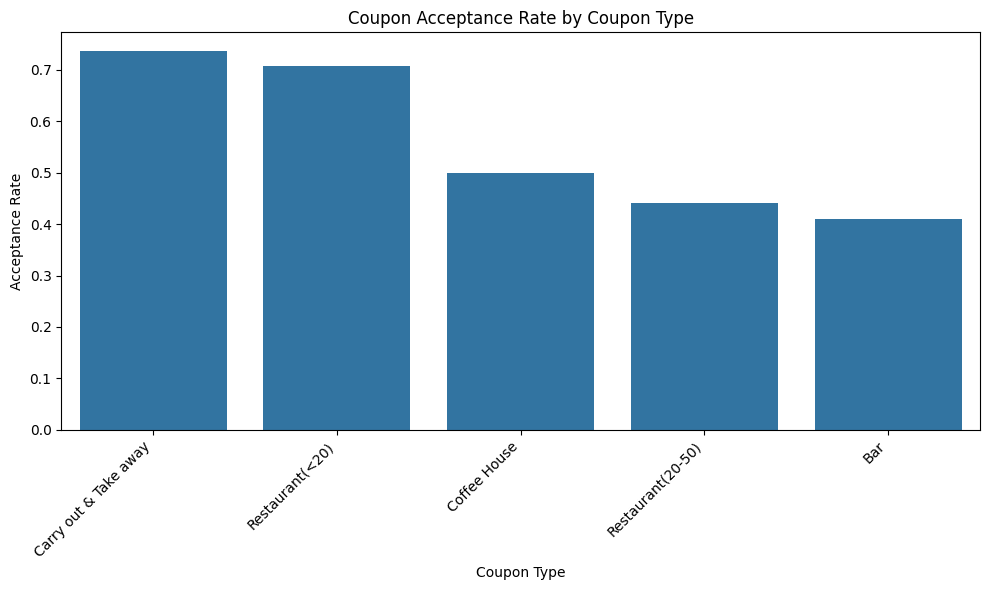

In [ ]:
## coupon acceptance rate by coupon type
coupon_acceptance_rate = data.groupby('coupon')['Y'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=coupon_acceptance_rate.index, y=coupon_acceptance_rate.values)
plt.xticks(rotation=45, ha='right')
plt.title('Coupon Acceptance Rate by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance Rate')
plt.tight_layout()
plt.show()

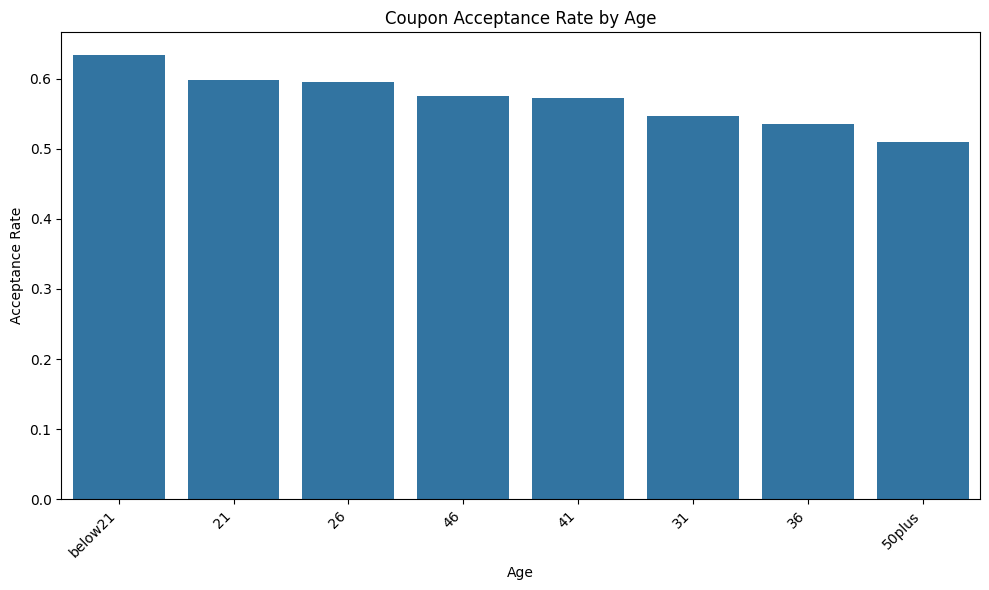

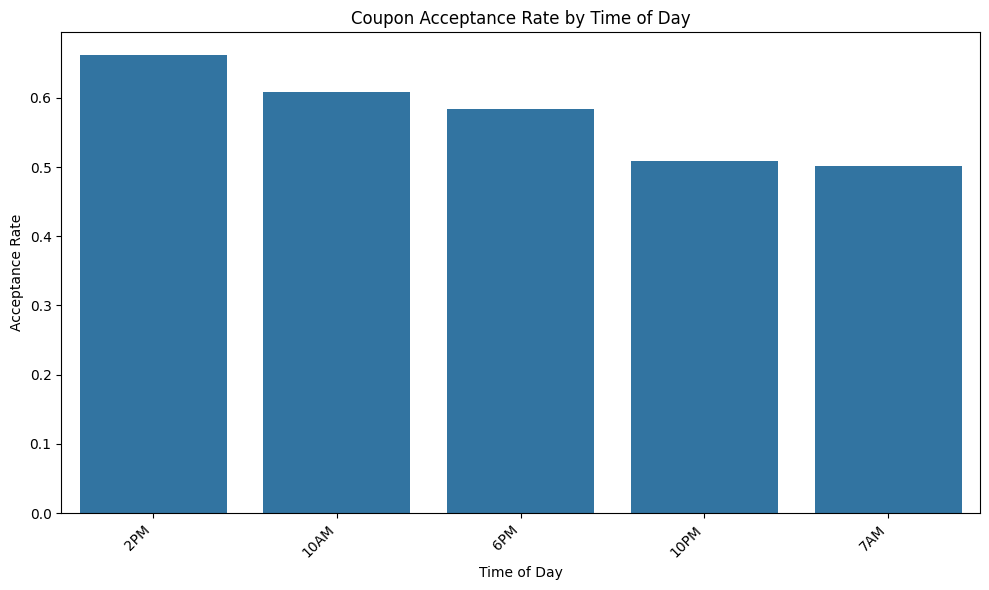

In [ ]:
## coupon acceptance rate by time of day

time_acceptance_rate = data.groupby('time')['Y'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=time_acceptance_rate.index, y=time_acceptance_rate.values)
plt.xticks(rotation=45, ha='right')
plt.title('Coupon Acceptance Rate by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Acceptance Rate')
plt.tight_layout()
plt.show()

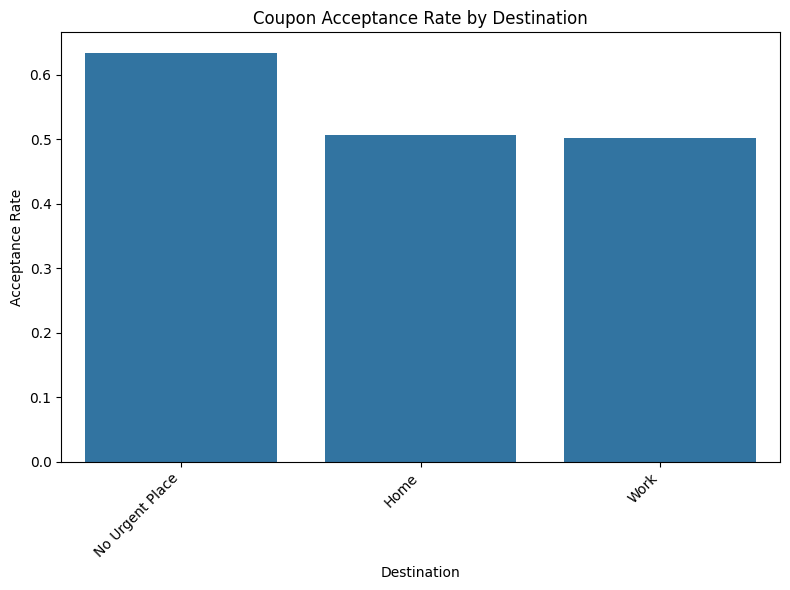

In [ ]:
## coupon acceptance rate by destination

destination_acceptance_rate = data.groupby('destination')['Y'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=destination_acceptance_rate.index, y=destination_acceptance_rate.values)
plt.xticks(rotation=45, ha='right')
plt.title('Coupon Acceptance Rate by Destination')
plt.xlabel('Destination')
plt.ylabel('Acceptance Rate')
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
bar_coupons = data[data['coupon'] == 'Bar'].copy()

2. What proportion of bar coupons were accepted?


In [ ]:
bar_acceptance_proportion = bar_coupons['Y'].mean()
print(f"Proportion of accepted bar coupons: {bar_acceptance_proportion:.2f}")

Proportion of accepted bar coupons: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [ ]:
bar_less_than_4 = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]
bar_4_or_more = bar_coupons[~bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]

acceptance_less_than_4 = bar_less_than_4['Y'].mean()
acceptance_4_or_more = bar_4_or_more['Y'].mean()

print(f"Acceptance rate for those who go to a bar 3 or fewer times a month: {acceptance_less_than_4:.2f}")
print(f"Acceptance rate for those who go to a bar 4 or more times a month: {acceptance_4_or_more:.2f}")

Acceptance rate for those who go to a bar 3 or fewer times a month: 0.37
Acceptance rate for those who go to a bar 4 or more times a month: 0.73


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [ ]:
bar_more_than_once = bar_coupons[bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])]
over_25 = bar_coupons[~bar_coupons['age'].isin(['below 21', '21'] )]

group1 = bar_more_than_once[bar_more_than_once.index.isin(over_25.index)]
group2 = bar_coupons[~bar_coupons.index.isin(group1.index)]

acceptance_group1 = group1['Y'].mean()
acceptance_group2 = group2['Y'].mean()

print(f"Acceptance rate for drivers who go to bar more than once a month and are over 25: {acceptance_group1:.2f}")
print(f"Acceptance rate for all other drivers: {acceptance_group2:.2f}")

Acceptance rate for drivers who go to bar more than once a month and are over 25: 0.69
Acceptance rate for all other drivers: 0.33


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
bar_more_than_once = bar_coupons[bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])]
not_kid_passenger = bar_coupons[bar_coupons['passanger'] != 'Kid(s)']
not_farming_fishing_forestry = bar_coupons[~bar_coupons['occupation'].isin(['Farming, Fishing, and Forestry'])]

group1 = bar_more_than_once[bar_more_than_once.index.isin(not_kid_passenger.index) & bar_more_than_once.index.isin(not_farming_fishing_forestry.index)]
group2 = bar_coupons[~bar_coupons.index.isin(group1.index)]

acceptance_group1 = group1['Y'].mean()
acceptance_group2 = group2['Y'].mean()

print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry: {acceptance_group1:.2f}")
print(f"Acceptance rate for all other drivers: {acceptance_group2:.2f}")

Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry: 0.71
Acceptance rate for all other drivers: 0.30


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [ ]:
bar_more_than_once_mask = data['Bar'].isin(['1~3', '4~8', 'gt8'])
not_kid_passenger_mask = data['passanger'] != 'Kid(s)'
not_widowed_mask = data['maritalStatus'] != 'Widowed'

under_30_mask = data['age'].isin(['below 21', '21', '26', '22', '23', '24', '25']) # Assuming ages up to 25 are considered under 30

cheap_restaurants_more_than_4_mask = data['RestaurantLessThan20'].isin(['4~8', 'gt8'])
income_less_than_50k_mask = data['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])

# Condition 1: go to bars more than once a month, had passengers that were not a kid, and were not widowed
condition1_mask = bar_more_than_once_mask & not_kid_passenger_mask & not_widowed_mask

# Condition 2: go to bars more than once a month and are under the age of 30
condition2_mask = bar_more_than_once_mask & under_30_mask

# Condition 3: go to cheap restaurants more than 4 times a month and income is less than 50K
condition3_mask = cheap_restaurants_more_than_4_mask & income_less_than_50k_mask

# Combine the conditions using OR
combined_condition_mask = condition1_mask | condition2_mask | condition3_mask

group1 = data[combined_condition_mask]
group2 = data[~combined_condition_mask]

acceptance_group1 = group1['Y'].mean()
acceptance_group2 = group2['Y'].mean()

print(f"Acceptance rate for the specified group: {acceptance_group1:.2f}")
print(f"Acceptance rate for all other drivers: {acceptance_group2:.2f}")

Acceptance rate for the specified group: 0.61
Acceptance rate for all other drivers: 0.54


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the analysis of bar coupons, it appears that drivers who frequent bars more often have a significantly higher acceptance rate.
Additionally, factors such as being over 25, not having kids as passengers, driving to non urgent location, and having occupations outside of farming, fishing, or forestry seems associated with a higher likelihood of accepting bar coupons.

Therefore, a possible hypothesis is that bar coupon acceptance is strongly influenced by the driver's existing bar-going habits and demographics that align with a typical bar-going demographic (e.g., age, lack of child passengers).

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
##Filter the data to create a DataFrame containing only the coffee house coupons and display the head to confirm.
coffee_house_coupons = data[data['coupon'] == 'Coffee House'].copy()
display(coffee_house_coupons.head())

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [ ]:
##Calculate and print the proportion of accepted coffee house coupons.
coffee_house_acceptance_proportion = coffee_house_coupons['Y'].mean()
print(f"Proportion of accepted coffee house coupons: {coffee_house_acceptance_proportion:.2f}")

Proportion of accepted coffee house coupons: 0.50


In [ ]:
##Calculate and print the acceptance rate for each category within the specified user attribute columns in the coffee_house_coupons DataFrame to understand how these attributes relate to coupon acceptance.

age_acceptance = coffee_house_coupons.groupby('age')['Y'].mean()
print("Acceptance rate by Age:")
print(age_acceptance)
print("\n")

gender_acceptance = coffee_house_coupons.groupby('gender')['Y'].mean()
print("Acceptance rate by Gender:")
print(gender_acceptance)
print("\n")

occupation_acceptance = coffee_house_coupons.groupby('occupation')['Y'].mean()
print("Acceptance rate by Occupation:")
print(occupation_acceptance)
print("\n")

income_acceptance = coffee_house_coupons.groupby('income')['Y'].mean()
print("Acceptance rate by Income:")
print(income_acceptance)
print("\n")

coffee_house_frequency_acceptance = coffee_house_coupons.groupby('CoffeeHouse')['Y'].mean()
print("Acceptance rate by Coffee House Frequency:")
print(coffee_house_frequency_acceptance)

Acceptance rate by Age:
age
21         0.524349
26         0.514828
31         0.476726
36         0.467662
41         0.501538
46         0.513636
50plus     0.420183
below21    0.696774
Name: Y, dtype: float64


Acceptance rate by Gender:
gender
Female    0.492443
Male      0.506427
Name: Y, dtype: float64


Acceptance rate by Occupation:
occupation
Architecture & Engineering                   0.555556
Arts Design Entertainment Sports & Media     0.507177
Building & Grounds Cleaning & Maintenance    0.727273
Business & Financial                         0.479452
Community & Social Services                  0.351351
Computer & Mathematical                      0.503341
Construction & Extraction                    0.478261
Education&Training&Library                   0.435811
Farming Fishing & Forestry                   0.545455
Food Preparation & Serving Related           0.445783
Healthcare Practitioners & Technical         0.743243
Healthcare Support                           0.61538

In [ ]:
##Calculate and print the acceptance rate for coffee house coupons based on time, weather, temperature, and passenger type.
time_acceptance = coffee_house_coupons.groupby('time')['Y'].mean()
print("Acceptance rate by Time:")
print(time_acceptance)
print("\n")

weather_acceptance = coffee_house_coupons.groupby('weather')['Y'].mean()
print("Acceptance rate by Weather:")
print(weather_acceptance)
print("\n")

temperature_acceptance = coffee_house_coupons.groupby('temperature')['Y'].mean()
print("Acceptance rate by Temperature:")
print(temperature_acceptance)
print("\n")

passanger_acceptance = coffee_house_coupons.groupby('passanger')['Y'].mean()
print("Acceptance rate by Passanger:")
print(passanger_acceptance)

Acceptance rate by Time:
time
10AM    0.640712
10PM    0.424242
2PM     0.547859
6PM     0.412626
7AM     0.445783
Name: Y, dtype: float64


Acceptance rate by Weather:
weather
Rainy    0.522124
Snowy    0.432343
Sunny    0.503605
Name: Y, dtype: float64


Acceptance rate by Temperature:
temperature
30    0.443396
55    0.455756
80    0.529779
Name: Y, dtype: float64


Acceptance rate by Passanger:
passanger
Alone        0.437943
Friend(s)    0.596906
Kid(s)       0.483092
Partner      0.570492
Name: Y, dtype: float64


**Data Analysis Key Findings**
* The overall acceptance rate for "Coffee House" coupons is 50%.
* Drivers aged below 21 have the highest coffee house coupon acceptance rate.
* Coffee house visit frequency is a strong predictor of coupon acceptance, with higher frequency correlating with higher acceptance rates.
* Acceptance rates vary significantly by time, with higher acceptance in the morning (10 AM) and lower acceptance in the evening (6 PM and 10 PM).
* Acceptance rates are notably higher when the driver is with friends or a partner.

**Insights and Next Steps**
* Targeting younger drivers (below 21) and those who frequent coffee houses could improve the redemption rate of "Coffee House" coupons.
* Consider the time of day and companion type when distributing "Coffee House" coupons for optimal results.